In [2]:
import numpy as np 
import pandas as pd 

# PART I - PREPARING DATA 

## Data from thailand institution 

In [3]:
neighbors = pd.read_csv('tambon_Eng_S.csv')
neighbors = neighbors.replace(np.nan,'n/a')
neighbors

,AD_LEVEL,TA_ID,TAMBON_E,AM_ID,AMPHOE_E,CH_ID,CHANGWAT_E,LAT,LONG
0,4,910106,Ko Sarai,9101,Mueang Satun,91,Satun,6.546,99.706
1,4,210114,Maptaphut,2101,Mueang Rayong,21,Rayong,12.646,101.171
2,4,210114,Maptaphut,2101,Mueang Rayong,21,Rayong,12.645,101.17
3,4,210114,Maptaphut,2101,Mueang Rayong,21,Rayong,12.649,101.174
4,4,210114,Maptaphut,2101,Mueang Rayong,21,Rayong,12.644,101.169
5,4,860116,Hat Sai Ri,8601,Mueang Chumphon,86,Chumphon,10.459,99.403
6,4,860706,Dan Sawi,8607,Sawi,86,Chumphon,10.291,99.241
7,4,440103,Tha Tum,4401,Mueang Maha Sarakham,44,Maha Sarakham,16.162,103.484
8,4,840401,Ang Thong,8404,Ko Samui,84,Surat Thani,9.708,99.675
9,4,840401,Ang Thong,8404,Ko Samui,84,Surat Thani,9.796,99.713


In [4]:
#Use only Bangkok 
neighbors_Bangkok = neighbors[neighbors['CHANGWAT_E'] == 'Bangkok']
neighbors_Bangkok.reset_index(drop = True, inplace = True)
neighbors_Bangkok.fillna('0')

#Create New Address 
neighbors_Bangkok['LABEL'] = neighbors_Bangkok.loc[:, 'TAMBON_E'] + "-" + neighbors_Bangkok.loc[:, 'AMPHOE_E'] 

#Examples 
neighbors_Bangkok.head()

C:\Users\Larnluang\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,AD_LEVEL,TA_ID,TAMBON_E,AM_ID,AMPHOE_E,CH_ID,CHANGWAT_E,LAT,LONG,LABEL
0,4,100106,Sao Chingcha,1001,Phra Nakhon,10,Bangkok,13.753,100.5,Sao Chingcha-Phra Nakhon
1,4,100105,San Chaopho Suea,1001,Phra Nakhon,10,Bangkok,13.754,100.497,San Chaopho Suea-Phra Nakhon
2,4,100108,Talat Yot,1001,Phra Nakhon,10,Bangkok,13.76,100.498,Talat Yot-Phra Nakhon
3,4,100103,Wat Ratchabophit,1001,Phra Nakhon,10,Bangkok,13.75,100.499,Wat Ratchabophit-Phra Nakhon
4,4,100104,Samran Rat,1001,Phra Nakhon,10,Bangkok,13.751,100.503,Samran Rat-Phra Nakhon


## Visualize Data Of Tambon 

In [5]:
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [6]:
address = 'Bangkok'
geolocator = Nominatim(user_agent = 'bkk_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The address is {} with lat: {} and long: {}'.format(address, latitude, longitude))

The address is Bangkok with lat: 13.7544238 and long: 100.4930399


In [7]:
#Create map of Toronto with neighborhood 
map_bkk = folium.Map(location = [latitude, longitude], zoom_start = 10)

#Add market 
for lat,long,label in zip (neighbors_Bangkok['LAT'], neighbors_Bangkok['LONG'],neighbors_Bangkok['LABEL']): 
    pop_label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat,long], 
        radius = 5,
        popup = pop_label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7, 
        parse_html = False).add_to(map_bkk)

map_bkk


# PART II - API DATA

In [8]:
from pandas.io.json import json_normalize
import requests

## Indentify client information

In [9]:
#Four Square Credential & Version 
CLIENT_ID = '--'
CLIENT_SECRET = '--'
VERSION = '20180605'
LIMIT = 100

## Sampling

### A - JSON to Dataframe

In [10]:
#Category of Transportation 
categoryId = '4d4b7105d754a06379d81259'

#Sample Venues In radius 2000 Meters or 2 KM 
sample_lat = neighbors_Bangkok.loc[0 , 'LAT']
sample_long = neighbors_Bangkok.loc[0 , 'LONG']

url = 'https://api.foursquare.com/v2/venues/search/?client_id={}&client_secret={}&ll={}&radius={}&limit={}&v={}&categoryId={}'.format(CLIENT_ID,CLIENT_SECRET,(str(sample_lat)+','+str(sample_long)), 2000, LIMIT, VERSION,categoryId)
url 

'https://api.foursquare.com/v2/venues/search/?client_id=QVY4EECLWNRWJYIFAW4DPRRCA0NKSZTIKUHGNWHJMHNWJHSH&client_secret=O2OS0PQYPCZKCHF342M0VQPQICQPLARKUVDC13WPQLYAVCE0&ll=13.753,100.5&radius=2000&limit=100&v=20180605&categoryId=4d4b7105d754a06379d81259'

In [11]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fe943404536486d2aa51c4d'},
 'response': {'venues': [{'id': '596350caf00a706a947bbec8',
    'name': 'Uncle & Friends : Rustic Cafe Bar',
    'location': {'address': '41 Mahannop Rd.',
     'lat': 13.753622870751355,
     'lng': 100.49975305862696,
     'labeledLatLngs': [{'label': 'display',
       'lat': 13.753622870751355,
       'lng': 100.49975305862696}],
     'distance': 74,
     'postalCode': '10200',
     'cc': 'TH',
     'city': 'พระนคร',
     'state': 'กรุงเทพมหานคร',
     'country': 'ประเทศไทย',
     'formattedAddress': ['41 Mahannop Rd.',
      'พระนคร',
      'กรุงเทพมหานคร 10200',
      'ประเทศไทย']},
    'categories': [{'id': '4bf58dd8d48988d16d941735',
      'name': 'Café',
      'pluralName': 'Cafés',
      'shortName': 'Café',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1609122624',
    'hasPerk': False},
   {'id': '5d3e67e6fd5

In [12]:
venues = results['response']['venues']
venues

[{'id': '596350caf00a706a947bbec8',
  'name': 'Uncle & Friends : Rustic Cafe Bar',
  'location': {'address': '41 Mahannop Rd.',
   'lat': 13.753622870751355,
   'lng': 100.49975305862696,
   'labeledLatLngs': [{'label': 'display',
     'lat': 13.753622870751355,
     'lng': 100.49975305862696}],
   'distance': 74,
   'postalCode': '10200',
   'cc': 'TH',
   'city': 'พระนคร',
   'state': 'กรุงเทพมหานคร',
   'country': 'ประเทศไทย',
   'formattedAddress': ['41 Mahannop Rd.',
    'พระนคร',
    'กรุงเทพมหานคร 10200',
    'ประเทศไทย']},
  'categories': [{'id': '4bf58dd8d48988d16d941735',
    'name': 'Café',
    'pluralName': 'Cafés',
    'shortName': 'Café',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1609122624',
  'hasPerk': False},
 {'id': '5d3e67e6fd54780007f4d67d',
  'name': 'MRT Wat Mangkon (BL29) (MRT วัดมังกร)',
  'location': {'address': 'Charoen Krung Rd',
   'crossStreet': 'Plaeng Nam 

In [13]:
nearby_venues = json_normalize(venues)
nearby_venues

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,596350caf00a706a947bbec8,41 Mahannop Rd.,TH,พระนคร,ประเทศไทย,NaN,74,"[41 Mahannop Rd., พระนคร, กรุงเทพมหานคร 10200,...","[{'label': 'display', 'lat': 13.75362287075135...",13.753623,100.499753,NaN,10200,กรุงเทพมหานคร,Uncle & Friends : Rustic Cafe Bar,v-1609122624
1,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",False,5d3e67e6fd54780007f4d67d,Charoen Krung Rd,TH,ป้อมปราบศัตรูพ่าย,ประเทศไทย,"Plaeng Nam Rd, Phlap Phla Chai Rd",1641,"[Charoen Krung Rd (Plaeng Nam Rd, Phlap Phla C...","[{'label': 'display', 'lat': 13.74208693331906...",13.742087,100.510211,NaN,10100,กรุงเทพมหานคร,MRT Wat Mangkon (BL29) (MRT วัดมังกร),v-1609122624
2,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'M...",False,5d3e860153c3dd00086f8855,Sanam Chai Rd,TH,พระนคร,ประเทศไทย,NaN,1131,"[Sanam Chai Rd, พระนคร, กรุงเทพมหานคร 10200, ป...","[{'label': 'display', 'lat': 13.74426766848044...",13.744268,100.494647,NaN,10200,กรุงเทพมหานคร,MRT Sanam Chai (BL31) (MRT สนามไชย),v-1609122624
3,"[{'id': '4e74f6cabd41c4836eac4c31', 'name': 'P...",False,563d8b23cd10033089f87b1d,ท่าน้ำท่าดินแดง,TH,NaN,ประเทศไทย,NaN,1440,"[ท่าน้ำท่าดินแดง, ประเทศไทย]","[{'label': 'display', 'lat': 13.74029401400217...",13.740294,100.497458,Wang Burapha Phirom,NaN,NaN,ท่าน้ำท่าดินแดง,v-1609122624
4,"[{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'B...",False,4eef1112f9ab8c5a0376122b,เฉลิมกรุง,TH,NaN,ประเทศไทย,NaN,660,"[เฉลิมกรุง, ประเทศไทย]","[{'label': 'display', 'lat': 13.74711139414656...",13.747111,100.499259,NaN,NaN,NaN,ป้ายรถเมล์เฉลิมกรุง,v-1609122624
5,"[{'id': '4e74f6cabd41c4836eac4c31', 'name': 'P...",False,4b714c2af964a520fa3f2de3,Baribatra Rd,TH,ป้อมปราบศัตรูพ่าย,ประเทศไทย,"Damrong Rak Rd, Khlong San Saep",744,"[Baribatra Rd (Damrong Rak Rd, Khlong San Saep...","[{'label': 'display', 'lat': 13.75568804278368...",13.755688,100.506306,NaN,10100,กรุงเทพมหานคร,ท่าเรือผ่านฟ้าลีลาศ (Panfa Leelard Pier) W4,v-1609122624
6,"[{'id': '4bf58dd8d48988d1df941735', 'name': 'B...",False,4c5f701c13791b8de9964daf,Phitsanulok Rd.,TH,ดุสิต,ประเทศไทย,Phitsanulok Rd & Phetchaburi Rd,2257,[Phitsanulok Rd. (Phitsanulok Rd & Phetchaburi...,"[{'label': 'display', 'lat': 13.75757830810084...",13.757578,100.520342,NaN,NaN,กรุงเทพมหานคร,Yommarat Intersection Flyover (สะพานข้ามแยกยมราช),v-1609122624
7,"[{'id': '4bf58dd8d48988d1df941735', 'name': 'B...",False,4baa5f42f964a520e8633ae3,Arun Amarin Rd.,TH,บางกอกน้อย,ประเทศไทย,NaN,2093,"[Arun Amarin Rd., บางกอกน้อย, กรุงเทพมหานคร 10...","[{'label': 'display', 'lat': 13.76131161567456...",13.761312,100.482631,NaN,10700,กรุงเทพมหานคร,Arun Amarin Bridge (สะพานอรุณอมรินทร์),v-1609122624
8,"[{'id': '4e74f6cabd41c4836eac4c31', 'name': 'P...",False,4b8f00a5f964a520c24333e3,Krung Kasem Rd,TH,พระนคร,ประเทศไทย,NaN,2118,"[Krung Kasem Rd, พระนคร, กรุงเทพมหานคร 10200, ...","[{'label': 'display', 'lat': 13.77203169723987...",13.772032,100.500339,NaN,10200,กรุงเทพมหานคร,ท่าเรือเทเวศร์ (Thewes Pier) N15,v-1609122624
9,"[{'id': '4bf58dd8d48988d1ee931735', 'name': 'H...",False,5ab934a5a22db76c94e915b8,1220 Song Wat Rd,TH,สัมพันธวงศ์,ประเทศไทย,NaN,1816,"[1220 Song Wat Rd, สัมพันธวงศ์, กรุงเทพมหานคร ...","[{'label': 'display', 'lat': 13.738221, 'lng':...",13.738221,100.507126,Chakkrawat,10100,กรุงเทพมหานคร,Hostel URBY,v-1609122624


In [14]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,Café,False,596350caf00a706a947bbec8,41 Mahannop Rd.,TH,พระนคร,ประเทศไทย,NaN,74,"[41 Mahannop Rd., พระนคร, กรุงเทพมหานคร 10200,...","[{'label': 'display', 'lat': 13.75362287075135...",13.753623,100.499753,NaN,10200,กรุงเทพมหานคร,Uncle & Friends : Rustic Cafe Bar,v-1609122624
1,Metro Station,False,5d3e67e6fd54780007f4d67d,Charoen Krung Rd,TH,ป้อมปราบศัตรูพ่าย,ประเทศไทย,"Plaeng Nam Rd, Phlap Phla Chai Rd",1641,"[Charoen Krung Rd (Plaeng Nam Rd, Phlap Phla C...","[{'label': 'display', 'lat': 13.74208693331906...",13.742087,100.510211,NaN,10100,กรุงเทพมหานคร,MRT Wat Mangkon (BL29) (MRT วัดมังกร),v-1609122624
2,Metro Station,False,5d3e860153c3dd00086f8855,Sanam Chai Rd,TH,พระนคร,ประเทศไทย,NaN,1131,"[Sanam Chai Rd, พระนคร, กรุงเทพมหานคร 10200, ป...","[{'label': 'display', 'lat': 13.74426766848044...",13.744268,100.494647,NaN,10200,กรุงเทพมหานคร,MRT Sanam Chai (BL31) (MRT สนามไชย),v-1609122624
3,Pier,False,563d8b23cd10033089f87b1d,ท่าน้ำท่าดินแดง,TH,NaN,ประเทศไทย,NaN,1440,"[ท่าน้ำท่าดินแดง, ประเทศไทย]","[{'label': 'display', 'lat': 13.74029401400217...",13.740294,100.497458,Wang Burapha Phirom,NaN,NaN,ท่าน้ำท่าดินแดง,v-1609122624
4,Bus Stop,False,4eef1112f9ab8c5a0376122b,เฉลิมกรุง,TH,NaN,ประเทศไทย,NaN,660,"[เฉลิมกรุง, ประเทศไทย]","[{'label': 'display', 'lat': 13.74711139414656...",13.747111,100.499259,NaN,NaN,NaN,ป้ายรถเมล์เฉลิมกรุง,v-1609122624
5,Pier,False,4b714c2af964a520fa3f2de3,Baribatra Rd,TH,ป้อมปราบศัตรูพ่าย,ประเทศไทย,"Damrong Rak Rd, Khlong San Saep",744,"[Baribatra Rd (Damrong Rak Rd, Khlong San Saep...","[{'label': 'display', 'lat': 13.75568804278368...",13.755688,100.506306,NaN,10100,กรุงเทพมหานคร,ท่าเรือผ่านฟ้าลีลาศ (Panfa Leelard Pier) W4,v-1609122624
6,Bridge,False,4c5f701c13791b8de9964daf,Phitsanulok Rd.,TH,ดุสิต,ประเทศไทย,Phitsanulok Rd & Phetchaburi Rd,2257,[Phitsanulok Rd. (Phitsanulok Rd & Phetchaburi...,"[{'label': 'display', 'lat': 13.75757830810084...",13.757578,100.520342,NaN,NaN,กรุงเทพมหานคร,Yommarat Intersection Flyover (สะพานข้ามแยกยมราช),v-1609122624
7,Bridge,False,4baa5f42f964a520e8633ae3,Arun Amarin Rd.,TH,บางกอกน้อย,ประเทศไทย,NaN,2093,"[Arun Amarin Rd., บางกอกน้อย, กรุงเทพมหานคร 10...","[{'label': 'display', 'lat': 13.76131161567456...",13.761312,100.482631,NaN,10700,กรุงเทพมหานคร,Arun Amarin Bridge (สะพานอรุณอมรินทร์),v-1609122624
8,Pier,False,4b8f00a5f964a520c24333e3,Krung Kasem Rd,TH,พระนคร,ประเทศไทย,NaN,2118,"[Krung Kasem Rd, พระนคร, กรุงเทพมหานคร 10200, ...","[{'label': 'display', 'lat': 13.77203169723987...",13.772032,100.500339,NaN,10200,กรุงเทพมหานคร,ท่าเรือเทเวศร์ (Thewes Pier) N15,v-1609122624
9,Hostel,False,5ab934a5a22db76c94e915b8,1220 Song Wat Rd,TH,สัมพันธวงศ์,ประเทศไทย,NaN,1816,"[1220 Song Wat Rd, สัมพันธวงศ์, กรุงเทพมหานคร ...","[{'label': 'display', 'lat': 13.738221, 'lng':...",13.738221,100.507126,Chakkrawat,10100,กรุงเทพมหานคร,Hostel URBY,v-1609122624


In [16]:
filtered_columns = ['categories', 'location.distance', 'location.lat', 'location.lng', 'name']
nearby_venues = nearby_venues[filtered_columns]
nearby_venues['label'] = 'SaoChingCha'
nearby_venues.head()

C:\Users\Larnluang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,categories,location.distance,location.lat,location.lng,name,label
0,Café,74,13.753623,100.499753,Uncle & Friends : Rustic Cafe Bar,SaoChingCha
1,Metro Station,1641,13.742087,100.510211,MRT Wat Mangkon (BL29) (MRT วัดมังกร),SaoChingCha
2,Metro Station,1131,13.744268,100.494647,MRT Sanam Chai (BL31) (MRT สนามไชย),SaoChingCha
3,Pier,1440,13.740294,100.497458,ท่าน้ำท่าดินแดง,SaoChingCha
4,Bus Stop,660,13.747111,100.499259,ป้ายรถเมล์เฉลิมกรุง,SaoChingCha


## Data API

### Exploring Neighborhood in Bangkok  

In [17]:
def getNearbyVenues(names, latitudes, longitudes, index, radius=2000, cateId = '4d4b7105d754a06379d81259' ):
    
    venues_list=[]
    for name,aid, lat, lng in zip(names, index, latitudes, longitudes): 
        print(name)
        
        #API url 
        url = 'https://api.foursquare.com/v2/venues/search/?client_id={}&client_secret={}&ll={}&radius={}&limit={}&v={}&categoryId={}'.format(CLIENT_ID,CLIENT_SECRET,(str(lat)+','+str(lng)), radius, LIMIT, VERSION,cateId)
        #print(url)
        
        # make the GET request
        results = requests.get(url).json()
        results = results['response']['venues']
        #print(results)
        
        #return only relevant information 
       
        venues_list.append([(
            name,
            aid,
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['location']['distance'],
            v['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                             'id',
              'Neighborhood Latitude', 
              'Neighborhood Longitude', 
              'Venue', 
              'Venue Latitude', 
              'Venue Longitude', 
              'Venue Distance', 
              'Venue Category']
        
        
    return(nearby_venues)
    
    

In [18]:
temp = neighbors_Bangkok.loc[:0,:]
temp

,AD_LEVEL,TA_ID,TAMBON_E,AM_ID,AMPHOE_E,CH_ID,CHANGWAT_E,LAT,LONG,LABEL
0,4,100106,Sao Chingcha,1001,Phra Nakhon,10,Bangkok,13.753,100.5,Sao Chingcha-Phra Nakhon


In [19]:
temp_transits = getNearbyVenues(names=temp['LABEL'],
                                   latitudes=temp['LAT'],
                                   longitudes=temp['LONG'],
                                   index = temp.index
                                  )
temp_transits

Sao Chingcha-Phra Nakhon


,Neighborhood,id,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Category
0,Sao Chingcha-Phra Nakhon,0,13.753,100.5,Uncle & Friends : Rustic Cafe Bar,13.753623,100.499753,74,Café
1,Sao Chingcha-Phra Nakhon,0,13.753,100.5,MRT Wat Mangkon (BL29) (MRT วัดมังกร),13.742087,100.510211,1641,Metro Station
2,Sao Chingcha-Phra Nakhon,0,13.753,100.5,MRT Sanam Chai (BL31) (MRT สนามไชย),13.744268,100.494647,1131,Metro Station
3,Sao Chingcha-Phra Nakhon,0,13.753,100.5,ท่าน้ำท่าดินแดง,13.740294,100.497458,1440,Pier
4,Sao Chingcha-Phra Nakhon,0,13.753,100.5,ป้ายรถเมล์เฉลิมกรุง,13.747111,100.499259,660,Bus Stop
5,Sao Chingcha-Phra Nakhon,0,13.753,100.5,ท่าเรือผ่านฟ้าลีลาศ (Panfa Leelard Pier) W4,13.755688,100.506306,744,Pier
6,Sao Chingcha-Phra Nakhon,0,13.753,100.5,Yommarat Intersection Flyover (สะพานข้ามแยกยมราช),13.757578,100.520342,2257,Bridge
7,Sao Chingcha-Phra Nakhon,0,13.753,100.5,Arun Amarin Bridge (สะพานอรุณอมรินทร์),13.761312,100.482631,2093,Bridge
8,Sao Chingcha-Phra Nakhon,0,13.753,100.5,ท่าเรือเทเวศร์ (Thewes Pier) N15,13.772032,100.500339,2118,Pier
9,Sao Chingcha-Phra Nakhon,0,13.753,100.5,Hostel URBY,13.738221,100.507126,1816,Hostel


In [20]:
bkk_transits = getNearbyVenues(names=neighbors_Bangkok['LABEL'],
                                   latitudes=neighbors_Bangkok['LAT'],
                                   longitudes=neighbors_Bangkok['LONG'],
                                   index = neighbors_Bangkok.index
                                  )


Sao Chingcha-Phra Nakhon
San Chaopho Suea-Phra Nakhon
Talat Yot-Phra Nakhon
Wat Ratchabophit-Phra Nakhon
Samran Rat-Phra Nakhon
Chana Songkhram-Phra Nakhon
Si Yaek Maha Nak-Dusit
n/a-Pom Prap Sattruphai
Ban Phan Thom-Phra Nakhon
n/a-Samphanthawong
n/a-Pom Prap Sattruphai
Bang Khun Phrom-Phra Nakhon
n/a-Pom Prap Sattruphai
n/a-Samphanthawong
Bowon Niwet-Phra Nakhon
n/a-Bang Rak
n/a-Samphanthawong
Wat Sam Phraya-Phra Nakhon
n/a-Pom Prap Sattruphai
n/a-Bang Rak
n/a-Pom Prap Sattruphai
n/a-Bang Rak
n/a-Thon Buri
n/a-Khlong San
Wang Burapha Phirom-Phra Nakhon
n/a-Thon Buri
n/a-Bang Rak
n/a-Phasi Charoen
n/a-Bangkok Yai
n/a-Khlong San
n/a-Rat Thewi
n/a-Phasi Charoen
n/a-Taling Chan
Wachira Phayaban-Dusit
n/a-Pathum Wan
n/a-Rat Thewi
n/a-Thon Buri
n/a-Pathum Wan
n/a-Bangkok Noi
n/a-Bang Kho Laem
n/a-Bang Rak
Phra Borom Maha Ratchawang-Phra Nakhon
n/a-Thon Buri
n/a-Bangkok Noi
n/a-Phasi Charoen
Suan Chit Lada-Dusit
n/a-Khlong San
n/a-Khlong Toei
n/a-Sa Thon
n/a-Pathum Wan
n/a-Bang Kho Laem
n/a

In [21]:
bkk_transits

,Neighborhood,id,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Category
0,Sao Chingcha-Phra Nakhon,0,13.753,100.500,Uncle & Friends : Rustic Cafe Bar,13.753623,100.499753,74,Café
1,Sao Chingcha-Phra Nakhon,0,13.753,100.500,MRT Wat Mangkon (BL29) (MRT วัดมังกร),13.742087,100.510211,1641,Metro Station
2,Sao Chingcha-Phra Nakhon,0,13.753,100.500,MRT Sanam Chai (BL31) (MRT สนามไชย),13.744268,100.494647,1131,Metro Station
3,Sao Chingcha-Phra Nakhon,0,13.753,100.500,ท่าน้ำท่าดินแดง,13.740294,100.497458,1440,Pier
4,Sao Chingcha-Phra Nakhon,0,13.753,100.500,ป้ายรถเมล์เฉลิมกรุง,13.747111,100.499259,660,Bus Stop
5,Sao Chingcha-Phra Nakhon,0,13.753,100.500,ท่าเรือผ่านฟ้าลีลาศ (Panfa Leelard Pier) W4,13.755688,100.506306,744,Pier
6,Sao Chingcha-Phra Nakhon,0,13.753,100.500,Yommarat Intersection Flyover (สะพานข้ามแยกยมราช),13.757578,100.520342,2257,Bridge
7,Sao Chingcha-Phra Nakhon,0,13.753,100.500,Arun Amarin Bridge (สะพานอรุณอมรินทร์),13.761312,100.482631,2093,Bridge
8,Sao Chingcha-Phra Nakhon,0,13.753,100.500,ท่าเรือเทเวศร์ (Thewes Pier) N15,13.772032,100.500339,2118,Pier
9,Sao Chingcha-Phra Nakhon,0,13.753,100.500,Luk Hostel,13.739791,100.507900,1700,Hostel


In [22]:
#See Unique Category 
set(bkk_transits['Venue Category'])

{'Airport',
 'Airport Food Court',
 'Airport Gate',
 'Airport Lounge',
 'Airport Service',
 'Airport Terminal',
 'Airport Tram',
 'Art Gallery',
 'Automotive Shop',
 'Ballroom',
 'Bar',
 'Bed & Breakfast',
 'Bike Rental / Bike Share',
 'Boarding House',
 'Boat Rental',
 'Boat or Ferry',
 'Bridge',
 'Building',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Café',
 'Campground',
 'Canal',
 'Cemetery',
 'Coffee Shop',
 'Coworking Space',
 'Cruise Ship',
 'Duty-free Shop',
 'Floating Market',
 'Garden',
 'Gas Station',
 'General Travel',
 'Harbor / Marina',
 'Historic Site',
 'Hostel',
 'Hotel',
 'Hotel Pool',
 'Indian Restaurant',
 'Inn',
 'Light Rail Station',
 'Metro Station',
 'Motel',
 'Moving Target',
 'Office',
 'Other Great Outdoors',
 'Parking',
 'Pier',
 'Platform',
 'Pool',
 'Port',
 'RV Park',
 'Rental Car Location',
 'Residential Building (Apartment / Condo)',
 'Resort',
 'Rest Area',
 'Shopping Mall',
 'Spa',
 'Taxi Stand',
 'Toll Booth',
 'Toll Plaza',
 'Tourist Information Ce

# PART III EXPLORING 

A - Finding BTS or MRT station which are two main public transportation in Bangkok 

In [23]:
criteria_bts = bkk_transits['Venue'].str.contains('BTS')
criteria_mrt = bkk_transits['Venue'].str.contains('MRT')

#criteria_Main
criteria = []
for c_b, c_m in zip (criteria_bts , criteria_mrt ): 
    criteria.append(c_b or c_m)
    
    
main_transit = bkk_transits[criteria]
main_transit.reset_index(drop = True)
main_transit

,Neighborhood,id,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Category
1,Sao Chingcha-Phra Nakhon,0,13.753,100.500,MRT Wat Mangkon (BL29) (MRT วัดมังกร),13.742087,100.510211,1641,Metro Station
2,Sao Chingcha-Phra Nakhon,0,13.753,100.500,MRT Sanam Chai (BL31) (MRT สนามไชย),13.744268,100.494647,1131,Metro Station
11,Sao Chingcha-Phra Nakhon,0,13.753,100.500,MRT Itsaraphap (BL32) (MRT อิสรภาพ),13.738217,100.485342,2284,Metro Station
12,Sao Chingcha-Phra Nakhon,0,13.753,100.500,MRT Sam Yot (BL30/PP23) (MRT สามยอด),13.747048,100.502500,715,Metro Station
45,San Chaopho Suea-Phra Nakhon,1,13.754,100.497,MRT Wat Mangkon (BL29) (MRT วัดมังกร),13.742087,100.510211,1949,Metro Station
46,San Chaopho Suea-Phra Nakhon,1,13.754,100.497,MRT Sanam Chai (BL31) (MRT สนามไชย),13.744268,100.494647,1112,Metro Station
54,San Chaopho Suea-Phra Nakhon,1,13.754,100.497,MRT Itsaraphap (BL32) (MRT อิสรภาพ),13.738217,100.485342,2162,Metro Station
55,San Chaopho Suea-Phra Nakhon,1,13.754,100.497,MRT Sam Yot (BL30/PP23) (MRT สามยอด),13.747048,100.502500,976,Metro Station
107,Talat Yot-Phra Nakhon,2,13.760,100.498,MRT Sam Yot (BL30/PP23) (MRT สามยอด),13.747048,100.502500,1521,Metro Station
108,Talat Yot-Phra Nakhon,2,13.760,100.498,MRT Sanam Chai (BL31) (MRT สนามไชย),13.744268,100.494647,1788,Metro Station


B - Finding Sub Transportation in Bangkok, Which is Bus Station

In [24]:
criteria_bus_stop = bkk_transits['Venue Category'].str.contains('Bus Stop')
criteria_bus_station = bkk_transits['Venue Category'].str.contains('Bus Station')
criteria_bus_line = bkk_transits['Venue Category'].str.contains('Bus Line')

#criteria_sub
criteria = []
for c_b, c_s , c_l in zip (criteria_bus_stop , criteria_bus_station, criteria_bus_line ): 
    criteria.append(c_b or c_s or c_l)
    

sub_transit = bkk_transits[criteria]
sub_transit.reset_index(drop = True)

,Neighborhood,id,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Category
0,Sao Chingcha-Phra Nakhon,0,13.753,100.500,ป้ายรถเมล์เฉลิมกรุง,13.747111,100.499259,660,Bus Stop
1,Sao Chingcha-Phra Nakhon,0,13.753,100.500,ป้ายรถเมล์วัดวิเศษฯ,13.755930,100.482346,1936,Bus Stop
2,Sao Chingcha-Phra Nakhon,0,13.753,100.500,"BMTA Bus Depot 73, 73A (ท่าปล่อยรถสาย 73, 73ก)",13.740261,100.497415,1445,Bus Station
3,Sao Chingcha-Phra Nakhon,0,13.753,100.500,Bus Depot 8 (ท่าปล่อยรถสาย 8),13.740264,100.497573,1441,Bus Station
4,Sao Chingcha-Phra Nakhon,0,13.753,100.500,BMTA Bus Stop สะพานพระปิ่นเกล้า-วัดดุสิตาราม (...,13.765222,100.488053,1876,Bus Stop
5,Sao Chingcha-Phra Nakhon,0,13.753,100.500,BMTA Bus Stop สะพานสมเด็จพระปิ่นเกล้า (Somdet ...,13.765672,100.488439,1884,Bus Stop
6,Sao Chingcha-Phra Nakhon,0,13.753,100.500,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.767091,100.506528,1720,Bus Station
7,San Chaopho Suea-Phra Nakhon,1,13.754,100.497,ป้ายรถเมล์เฉลิมกรุง,13.747111,100.499259,804,Bus Stop
8,San Chaopho Suea-Phra Nakhon,1,13.754,100.497,ป้ายรถเมล์วัดวิเศษฯ,13.755930,100.482346,1598,Bus Stop
9,San Chaopho Suea-Phra Nakhon,1,13.754,100.497,"BMTA Bus Depot 73, 73A (ท่าปล่อยรถสาย 73, 73ก)",13.740261,100.497415,1530,Bus Station


### B - Find Nearest Main Transportation / Bus station 

According to TOD theory, Main transportation should be accessible in 1.2 km or accessible to bustation that can get to main transportation in 10 mins, which is 2.5 km calculated from Thai car average velocity 

In [25]:
#Find Nearest Transit 
nearest_main = main_transit.groupby(by = 'id').min()
nearest_main = nearest_main.add_prefix('Main_')
nearest_main

,Main_Neighborhood,Main_Neighborhood Latitude,Main_Neighborhood Longitude,Main_Venue,Main_Venue Latitude,Main_Venue Longitude,Main_Venue Distance,Main_Venue Category
id,,,,,,,,
0,Sao Chingcha-Phra Nakhon,13.753,100.500,MRT Itsaraphap (BL32) (MRT อิสรภาพ),13.738217,100.485342,715,Metro Station
1,San Chaopho Suea-Phra Nakhon,13.754,100.497,MRT Itsaraphap (BL32) (MRT อิสรภาพ),13.738217,100.485342,976,Metro Station
2,Talat Yot-Phra Nakhon,13.760,100.498,MRT Sam Yot (BL30/PP23) (MRT สามยอด),13.744268,100.494647,1521,Metro Station
3,Wat Ratchabophit-Phra Nakhon,13.750,100.499,BTS Khlong San (G3) (BTS คลองสาน),13.730344,100.485342,501,Light Rail Station
4,Samran Rat-Phra Nakhon,13.751,100.503,BTS Khlong San (G3) (BTS คลองสาน),13.730344,100.485342,443,Light Rail Station
5,Chana Songkhram-Phra Nakhon,13.762,100.495,MRT Bang Khun Non (BL04/OR01) (MRT บางขุนนนท์),13.744268,100.473694,1851,Metro Station
6,Si Yaek Maha Nak-Dusit,13.758,100.517,BTS National Stadium (W1) (BTS สนามกีฬาแห่งชาติ),13.737651,100.502500,1711,Metro Station
7,n/a-Pom Prap Sattruphai,13.752,100.507,BTS National Stadium (W1) (BTS สนามกีฬาแห่งชาติ),13.737651,100.494647,735,Metro Station
8,Ban Phan Thom-Phra Nakhon,13.762,100.503,MRT Sam Yot (BL30/PP23) (MRT สามยอด),13.742087,100.494647,1665,Metro Station


In [26]:
#Find Nearest Transit 
nearest_sub = sub_transit.groupby(by = 'id').min()
nearest_sub = nearest_sub.add_prefix('Sub_')
nearest_sub


,Sub_Neighborhood,Sub_Neighborhood Latitude,Sub_Neighborhood Longitude,Sub_Venue,Sub_Venue Latitude,Sub_Venue Longitude,Sub_Venue Distance,Sub_Venue Category
id,,,,,,,,
0,Sao Chingcha-Phra Nakhon,13.753,100.500,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.740261,100.482346,660,Bus Station
1,San Chaopho Suea-Phra Nakhon,13.754,100.497,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.740261,100.482346,804,Bus Station
2,Talat Yot-Phra Nakhon,13.760,100.498,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.747111,100.482346,261,Bus Station
3,Wat Ratchabophit-Phra Nakhon,13.750,100.499,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.740261,100.482346,322,Bus Station
4,Samran Rat-Phra Nakhon,13.751,100.503,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.740261,100.497415,592,Bus Station
5,Chana Songkhram-Phra Nakhon,13.762,100.495,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.747111,100.482346,818,Bus Station
7,n/a-Pom Prap Sattruphai,13.752,100.507,"BMTA Bus Depot 73, 73A (ท่าปล่อยรถสาย 73, 73ก)",13.740261,100.497415,1667,Bus Station
8,Ban Phan Thom-Phra Nakhon,13.762,100.503,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.747111,100.488053,683,Bus Station
11,Bang Khun Phrom-Phra Nakhon,13.765,100.505,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.757907,100.488053,285,Bus Station


In [27]:
#Join 
bkk_tod_info = neighbors_Bangkok.join(nearest_main).join(nearest_sub)
#bkk_tod_info = bkk_tod_info.fillna(0)
bkk_tod_info

,AD_LEVEL,TA_ID,TAMBON_E,AM_ID,AMPHOE_E,CH_ID,CHANGWAT_E,LAT,LONG,LABEL,...,Main_Venue Distance,Main_Venue Category,Sub_Neighborhood,Sub_Neighborhood Latitude,Sub_Neighborhood Longitude,Sub_Venue,Sub_Venue Latitude,Sub_Venue Longitude,Sub_Venue Distance,Sub_Venue Category
0,4,100106,Sao Chingcha,1001,Phra Nakhon,10,Bangkok,13.753,100.5,Sao Chingcha-Phra Nakhon,...,715.0,Metro Station,Sao Chingcha-Phra Nakhon,13.753,100.500,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.740261,100.482346,660.0,Bus Station
1,4,100105,San Chaopho Suea,1001,Phra Nakhon,10,Bangkok,13.754,100.497,San Chaopho Suea-Phra Nakhon,...,976.0,Metro Station,San Chaopho Suea-Phra Nakhon,13.754,100.497,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.740261,100.482346,804.0,Bus Station
2,4,100108,Talat Yot,1001,Phra Nakhon,10,Bangkok,13.76,100.498,Talat Yot-Phra Nakhon,...,1521.0,Metro Station,Talat Yot-Phra Nakhon,13.760,100.498,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.747111,100.482346,261.0,Bus Station
3,4,100103,Wat Ratchabophit,1001,Phra Nakhon,10,Bangkok,13.75,100.499,Wat Ratchabophit-Phra Nakhon,...,501.0,Light Rail Station,Wat Ratchabophit-Phra Nakhon,13.750,100.499,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.740261,100.482346,322.0,Bus Station
4,4,100104,Samran Rat,1001,Phra Nakhon,10,Bangkok,13.751,100.503,Samran Rat-Phra Nakhon,...,443.0,Light Rail Station,Samran Rat-Phra Nakhon,13.751,100.503,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.740261,100.497415,592.0,Bus Station
5,4,100109,Chana Songkhram,1001,Phra Nakhon,10,Bangkok,13.762,100.495,Chana Songkhram-Phra Nakhon,...,1851.0,Metro Station,Chana Songkhram-Phra Nakhon,13.762,100.495,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.747111,100.482346,818.0,Bus Station
6,4,100204,Si Yaek Maha Nak,1002,Dusit,10,Bangkok,13.758,100.517,Si Yaek Maha Nak-Dusit,...,1711.0,Metro Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,100804,n/a,1008,Pom Prap Sattruphai,10,Bangkok,13.752,100.507,n/a-Pom Prap Sattruphai,...,735.0,Metro Station,n/a-Pom Prap Sattruphai,13.752,100.507,"BMTA Bus Depot 73, 73A (ท่าปล่อยรถสาย 73, 73ก)",13.740261,100.497415,1667.0,Bus Station
8,4,100110,Ban Phan Thom,1001,Phra Nakhon,10,Bangkok,13.762,100.503,Ban Phan Thom-Phra Nakhon,...,1665.0,Metro Station,Ban Phan Thom-Phra Nakhon,13.762,100.503,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),13.747111,100.488053,683.0,Bus Station
9,4,101303,n/a,1013,Samphanthawong,10,Bangkok,13.734,100.513,n/a-Samphanthawong,...,575.0,Light Rail Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#Using only Important Data
filtered_columns = ['LABEL','LAT','LONG', 'Main_Venue',  'Main_Venue Distance' , 'Main_Venue Category' , 'Sub_Venue',  'Sub_Venue Distance' , 'Sub_Venue Category' ]
bkk_tod = bkk_tod_info[filtered_columns]
bkk_tod

,LABEL,LAT,LONG,Main_Venue,Main_Venue Distance,Main_Venue Category,Sub_Venue,Sub_Venue Distance,Sub_Venue Category
0,Sao Chingcha-Phra Nakhon,13.753,100.5,MRT Itsaraphap (BL32) (MRT อิสรภาพ),715.0,Metro Station,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),660.0,Bus Station
1,San Chaopho Suea-Phra Nakhon,13.754,100.497,MRT Itsaraphap (BL32) (MRT อิสรภาพ),976.0,Metro Station,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),804.0,Bus Station
2,Talat Yot-Phra Nakhon,13.76,100.498,MRT Sam Yot (BL30/PP23) (MRT สามยอด),1521.0,Metro Station,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),261.0,Bus Station
3,Wat Ratchabophit-Phra Nakhon,13.75,100.499,BTS Khlong San (G3) (BTS คลองสาน),501.0,Light Rail Station,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),322.0,Bus Station
4,Samran Rat-Phra Nakhon,13.751,100.503,BTS Khlong San (G3) (BTS คลองสาน),443.0,Light Rail Station,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),592.0,Bus Station
5,Chana Songkhram-Phra Nakhon,13.762,100.495,MRT Bang Khun Non (BL04/OR01) (MRT บางขุนนนท์),1851.0,Metro Station,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),818.0,Bus Station
6,Si Yaek Maha Nak-Dusit,13.758,100.517,BTS National Stadium (W1) (BTS สนามกีฬาแห่งชาติ),1711.0,Metro Station,NaN,NaN,NaN
7,n/a-Pom Prap Sattruphai,13.752,100.507,BTS National Stadium (W1) (BTS สนามกีฬาแห่งชาติ),735.0,Metro Station,"BMTA Bus Depot 73, 73A (ท่าปล่อยรถสาย 73, 73ก)",1667.0,Bus Station
8,Ban Phan Thom-Phra Nakhon,13.762,100.503,MRT Sam Yot (BL30/PP23) (MRT สามยอด),1665.0,Metro Station,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),683.0,Bus Station
9,n/a-Samphanthawong,13.734,100.513,BTS Charoen Nakhon (G2) (BTS เจริญนคร),575.0,Light Rail Station,NaN,NaN,NaN


### C - PASS TOD Criteria 

In [29]:
criteria_main_a = bkk_tod['Main_Venue Distance'] <= 1200 
criteria_main_b = bkk_tod['Main_Venue Distance'] <= 2300 
criteria_sub = bkk_tod['Sub_Venue Distance'] <= 1200

criteria = []
for cma,cmb,cs in zip (criteria_main_a,criteria_main_b,criteria_sub): 
    result = cma or (cmb and cs)
    criteria.append(result)
    
bkk_tod['Pass_TOD'] = criteria
bkk_tod

C:\Users\Larnluang\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,LABEL,LAT,LONG,Main_Venue,Main_Venue Distance,Main_Venue Category,Sub_Venue,Sub_Venue Distance,Sub_Venue Category,Pass_TOD
0,Sao Chingcha-Phra Nakhon,13.753,100.5,MRT Itsaraphap (BL32) (MRT อิสรภาพ),715.0,Metro Station,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),660.0,Bus Station,True
1,San Chaopho Suea-Phra Nakhon,13.754,100.497,MRT Itsaraphap (BL32) (MRT อิสรภาพ),976.0,Metro Station,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),804.0,Bus Station,True
2,Talat Yot-Phra Nakhon,13.76,100.498,MRT Sam Yot (BL30/PP23) (MRT สามยอด),1521.0,Metro Station,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),261.0,Bus Station,True
3,Wat Ratchabophit-Phra Nakhon,13.75,100.499,BTS Khlong San (G3) (BTS คลองสาน),501.0,Light Rail Station,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),322.0,Bus Station,True
4,Samran Rat-Phra Nakhon,13.751,100.503,BTS Khlong San (G3) (BTS คลองสาน),443.0,Light Rail Station,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),592.0,Bus Station,True
5,Chana Songkhram-Phra Nakhon,13.762,100.495,MRT Bang Khun Non (BL04/OR01) (MRT บางขุนนนท์),1851.0,Metro Station,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),818.0,Bus Station,True
6,Si Yaek Maha Nak-Dusit,13.758,100.517,BTS National Stadium (W1) (BTS สนามกีฬาแห่งชาติ),1711.0,Metro Station,NaN,NaN,NaN,False
7,n/a-Pom Prap Sattruphai,13.752,100.507,BTS National Stadium (W1) (BTS สนามกีฬาแห่งชาติ),735.0,Metro Station,"BMTA Bus Depot 73, 73A (ท่าปล่อยรถสาย 73, 73ก)",1667.0,Bus Station,True
8,Ban Phan Thom-Phra Nakhon,13.762,100.503,MRT Sam Yot (BL30/PP23) (MRT สามยอด),1665.0,Metro Station,BMTA Bus Depot 23 (ท่าปล่อยรถสาย 23),683.0,Bus Station,True
9,n/a-Samphanthawong,13.734,100.513,BTS Charoen Nakhon (G2) (BTS เจริญนคร),575.0,Light Rail Station,NaN,NaN,NaN,True


# PART IV - VISUALIZING 

In [30]:
#Create Map 
map_tod = folium.Map(location = [latitude,longitude], zoom_start = 10)

#Color Schemes 
color = ['red', 'green']

#Add markers 
markers_colors = []

for lat,lon,poi,tod in zip (bkk_tod['LAT'],bkk_tod['LONG'], bkk_tod['LABEL'], bkk_tod['Pass_TOD']):
    label = folium.Popup(str(poi) + ' TOD ' + str(int(tod)), parse_html = True)
    
    folium.CircleMarker(
        [lat,lon], 
        radius = 5,
        popup = label, 
        color = color[int(tod)], 
        fill = True, 
        fill_color = color[int(tod)], 
        fill_opacity = 0.7).add_to(map_tod)
    

map_tod

# PART V - ANALYSIS 

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
print('upload Seaborn')

upload Seaborn


A - Main Transportation Distribution

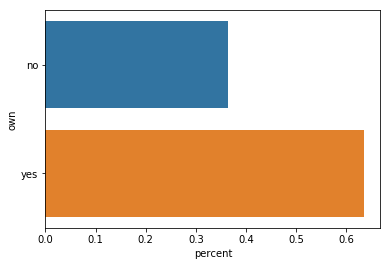

In [151]:
#Have Main Transportation 
length = len(bkk_tod['Main_Venue Distance'])
no_main = (bkk_tod['Main_Venue Distance'].isna().sum())/length
have_main = 1 - no_main

list_main_trans = pd.DataFrame([no_main, have_main])
list_main_trans['bool']= ['no' , 'yes']
list_main_trans.columns = ['percent' , 'own']
list_main_trans

sns.barplot(x = 'percent', y = 'own', data = list_main_trans) 

In [143]:
list_main_trans

,percent,pass
0,0.363636,no
1,0.636364,yes


Text(1200, 0.0006, ' 1.2 Km\n an aproximate\n convenience distance')

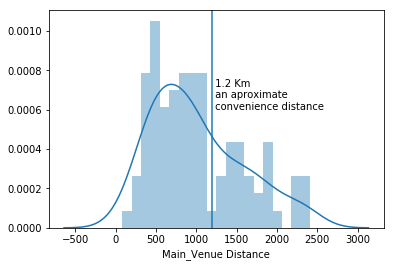

In [92]:
#Main Transportation in Convenience Area 
temp_main = bkk_tod['Main_Venue Distance'].dropna()
sns.distplot(temp_main, bins = 20)
plt.axvline(1200, 0,1)
plt.text(1200, 00.0006, ' 1.2 Km\n an aproximate\n convenience distance')


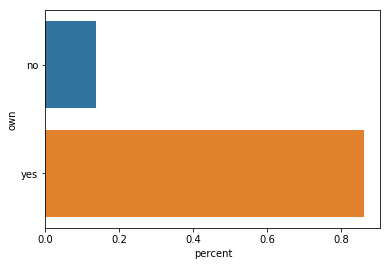

In [150]:
#Have Sub Transportation 
length = len(bkk_tod['Sub_Venue Distance'])
no_sub = (bkk_tod['Sub_Venue Distance'].isna().sum())/length
have_sub = 1 - no_sub

list_sub_trans = pd.DataFrame([no_sub, have_sub])
list_sub_trans['bool']= ['no' , 'yes']
list_sub_trans.columns = ['percent' , 'own']
list_sub_trans

sns.barplot(x = 'percent', y = 'own', data = list_sub_trans) 

In [144]:
list_sub_trans

,percent,pass
0,0.136364,no
1,0.863636,yes


Text(1200, 0.0006, ' 1.2 Km\n an aproximate\n convenience distance')

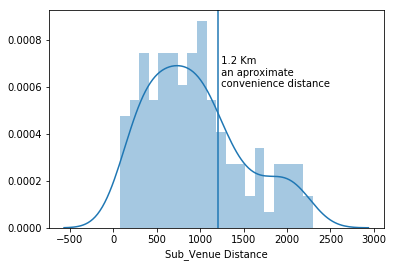

In [148]:
temp_sub = bkk_tod['Sub_Venue Distance'].dropna()
sns.distplot(temp_sub, bins = 20)
plt.axvline(1200, 0,1)
plt.text(1200, 00.0006, ' 1.2 Km\n an aproximate\n convenience distance', horizontalalignment='left')

C - Criteria Passing 


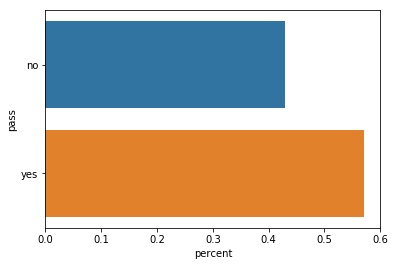

In [112]:
temp_pass = bkk_tod['Pass_TOD']
pass_crt = temp_pass.sum()/length
notpass_crt = 1 - pass_crt

list_pass_trans = pd.DataFrame([notpass_crt, pass_crt])
list_pass_trans['bool']= ['no' , 'yes']
list_pass_trans.columns = ['percent' , 'pass']
list_pass_trans

sns.barplot(x = 'percent', y = 'pass', data = list_pass_trans) 

In [145]:
list_pass_trans

,percent,pass
0,0.428571,no
1,0.571429,yes


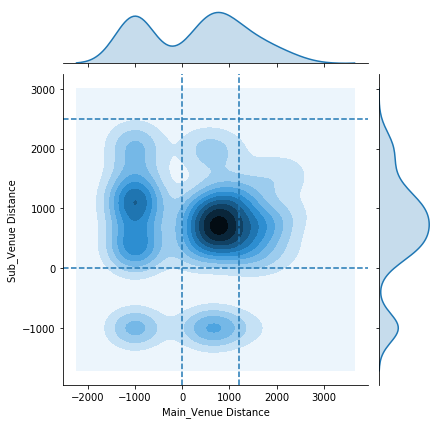

In [142]:
#Joinplot 

plot = sns.jointplot( bkk_tod['Main_Venue Distance'].fillna(-1000) , bkk_tod['Sub_Venue Distance'].fillna(-1000) , kind = 'kde')
plot.ax_joint.axvline(x=1200,linestyle='--')
plot.ax_joint.axvline(x=0,linestyle='--')
plot.ax_joint.axhline(y=2500,linestyle='--')
plot.ax_joint.axhline(y=0,linestyle='--')
